# RAMP starting kit : Who Wrote This ?

_Authors: Romain AVOUAC, Jaime COSTA, Adrien DANEL, Guillaume DESFORGES, José-Louis IMBERT, Slimane THABET_

**TODO** : ajouter l'illustration wordcloud

## Table of Contents

0. [Introduction](#Introduction)
1. [Data](#Data)
2. [Score metric](#Score-metric)
3. [Library requirements](#Library-requirements)
4. [Basic text preprocessing](#Basic-text-preprocessing)
5. [Exploratory analysis](#Exploratory-analysis)
6. [Predictions](#Predictions)
6. [Ramp workflow](#Ramp-workflow)
9. [More information](#More-information)

## Introduction

Authorship identification is the task of recognizing who the author of a document is.
It is part of the Natural Language Processing (NLP) kind of tasks.

Being able to identify the author of a document presents several applications, such as detecting plagiarism or finding the author of an anonymous document.
Archives all around the world are full of documents for which knowing the author would be invaluable knowledge for historical studies.
Furthermore, [the multiple plagiarism scandals](https://lithub.com/12-literary-plagiarism-scandals-ranked/) in literature could be solved with an algorithm.
For instance the authorship of Moliere or Shakespeare has been debated from the 19th century (more on this [here](https://fr.wikipedia.org/wiki/Paternit%C3%A9_des_%C5%93uvres_de_Moli%C3%A8re) and [here](https://fr.wikipedia.org/wiki/Paternit%C3%A9_des_%C5%93uvres_de_Shakespeare)).

This task has also an instructive purpose.
It is a way to investigate if NLP algorithms are able to capture bot only the semantics, but also the literary style of a document.

## Data

We will limit ourselves to a selection of French novelists from the 19th century. The idea of this challenge is to see if an algorithm can identify some literary style for determining the author. In the general case, it can be very easy to differentiate documents on the genre e.g between novels, poems, and plays. The same is true for the period of writing, one can easily differentiate 17th century and 20th century style. Therefore, we decided to select authors from the same literary genre and the same period. 

The 19th century seems ideal for this classification task as its language is close enough to contemporary French (allowing therefore a simple use of pre-loaded dictionnaries, stopwords, etc...), studied in class and features coherent and indetifiable litterary movements (whereas the 20th century litterary landscape is much more scattered). Moreover, 19th century books are in the public domain.


The following authors were selected in a attempt to be representative of the different styles of novels written in the 19th century:

-  **Naturalism :**
     - Zola
     - Maupassant
     - Daudet
     
-  **Literary realism:**
     - Stendhal
     - Balzac
     - Flaubert
     
-  **Romanticism:**
     - Hugo
     - Dumas
     - Vigny
     
-  **Early science-fiction/avant garde:**
     - Verne

We therefore have a meaninful sample of three litterary movements, and an *outlier*, Jules Verne. This can provide interesting follow-up analyses based on the results of this challenge.

For each author, 3 books have been selected with 2 for training and 1 for test. This clear distinction of books has been done to avoid any data leakage (through the character names for instance). Each book has been cut into different paragraphs.



**TODO**:
* pourquoi le 19eme ?
* quels auteurs ? pourquoi ?
* quels textes ? pourquoi ?

**TODO** lister
* les fichiers
* ce à quoi ils servent
* leurs colonnes et la signification

## Score metric

We want to predict the author of a given piece of litterature from a given set of authors.
In machine learning, this type of problem is called "multiclass classification" problem, that is for each item we predict the class that it belongs to.
Here, the items are the documents (one or more paragraphs) and the classes are the authors.

In order to evaluate the performance of an algorithm solving this type of problems, one could propose the *precision* of the algorithm.
The precision of an algorithm in the prediction of a given class is defined as the number of right predictions on that class divided by the number of items where the algorithm predicted it.
Then we could compute for instance the mean precision of the algorithm on all the classes.

On the other hand, one could say that the *recall* of the algorithm is also important, or its *accuracy*.

Most of the time, an algorithm can be tweaked to offer a better precision or a better recall, but not both at the same time - there is no free lunch.
There is a tradeoff to be made, usually depending on the application domain.
For example, in a medical team you would want as little false negatives.

In order to evaluate the model, we propose to use the F1 metric.

**TODO** continuer en présentant la F1.

## Library requirements

To run this starting kit, the following libraries are required : 
- `numpy`
- `pandas`
- `nltk`
- `plotly`
- `plotly_express`
- `matplotlib`
- `seaborn`
- `scikit-learn`
- `gensim`

They can be installed all at once using the `requirements.txt` file with pip :

In [ ]:
!pip install -r requirements.txt

In order to make submissions to the challenge, the `ramp-workflow` library is also needed. It can be installed from GitHub using pip :

In [4]:
# !pip install git+https://github.com/paris-saclay-cds/ramp-workflow

## Exploratory analysis

### Download and load data

In [2]:
import pandas as pd
df = pd.read_csv("",sep="|")

### Basic text preprocessing

NLP data is special in the sense that it is unstructured.
Structured data are tables where each item is a set of key-value pairs, each pair reflecting a feature of the item.
In this challenge, each item is a document of natural text.
Most algorithm can't process those raw text as a sequence of characters, and it is part of the job of a data scientist to design the proper data processing pipelines.

Usually, it starts with a tokenization step where the document is cut into pieces, such as words.
Transforming the data from a sequence of characters to a sequence of words can then help engineering actual features for each document.

Below is a simple tokenization :

**TODO** ajouter la tokenization

**TODO** écrire quelques limites/suggestions d'amélioration

### Basic features and statistics

In [4]:
from nltk import word_tokenize, download
from re import split
from numpy import mean

download('punkt', quiet=True)

_punctuation = '.?!:;&()`"\'@°_-~'

def _getWordFeatures(tokens):

    tokensLengths = [len(t) for t in tokens]
    return mean(tokensLengths), max(tokensLengths)

def _buildSentencesFeatures(text):

    sentences = split(pattern='\\. |\\! |\\? ', string=text)
    sentencesLengths = [len(word_tokenize(s)) for s in sentences]

    return len(sentences), mean(sentencesLengths), max(sentencesLengths)

def _getWordsWithNumbersCount(tokens):
    return sum([any(c.isdigit() for c in t) for t in tokens])

def _getWordsWithPunctuationCount(tokens):
    return sum([any(c in _punctuation for c in t) for t in tokens])

def _getCommonWordsCount(tokens):
    return sum([t in _commonWords for t in tokens])

def _getCommonWordsAverageFrequency(tokens):
    return mean([_commonWords[t] if t in _commonWords else 0.0 for t in tokens])
                          
def _analyze_single(text):

    features = {}

    # Sentences Features
    features['numberOfSentences'], features['meanSentenceLength'], features['maxSentenceLength'] = _buildSentencesFeatures(text)

    # Tokenize
    tokens = word_tokenize(text)
    percentage = int(100000 / len(tokens)) / 1000

    # Word based features
    features['wordCount'] = len(tokens)
    features['meanWordLength'], features['maxWordLength'] = _getWordFeatures(tokens)

    # Specific tokens based features
    features['wordsWithNumbersPercentage'] = _getWordsWithNumbersCount(tokens) * percentage
    features['wordsWithPunctuationPercentage'] = _getWordsWithPunctuationCount(tokens) * percentage

    del tokens

    return features

df_feats = df['paragraph'].apply(lambda x : _analyze_single(x))

**TODO** si on garde cette partie, l'améliorer car dégueu actuellement (**AD**)

In [ ]:
l_nof = []
l_wordcount = []
l_meanWordLength = []
l_maxWordLength = []
l_wordsWithNumbersPercentage = []
l_wordsWithPunctuationPercentage = []

for i in range(len(df_feats)):
    
    l_nof.append(df_feats[i]['numberOfSentences'])
    l_meanWordLength.append(df_feats[i]['meanWordLength'])
    l_maxWordLength.append(df_feats[i]['maxWordLength'])
    l_wordsWithNumbersPercentage.append(df_feats[i]['wordsWithNumbersPercentage'])
    l_wordsWithPunctuationPercentage.append(df_feats[i]['wordsWithPunctuationPercentage'])
    l_wordcount.append(df_feats[i]['wordCount'])

df = df.assign(numberOfSentences = l_nof, wordCount = l_wordcount, meanWordLength = l_meanWordLength,
               maxWordLength = l_maxWordLength, wordsWithNumbersPercentage = l_wordsWithNumbersPercentage,
               wordsWithPunctuationPercentage = l_wordsWithPunctuationPercentage)

df.head()

### Using tf-idf to cluster the data

To show that tf-idf is a good first approach to indetify the authors, we can use it to cluster the data and show that the author distribution among clusters is uneven. In this case, we can use a simple tf-idf computation as the feature extractor for the baseline scenario.

**TO DO**: clean code if we decide to keep those graphs

In [32]:
df_2 = pd.DataFrame(df.groupby('author')['tokenized'].apply(lambda s: s.sample(600)))

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_2.tokenized)
model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
df_2['cluster'] = model.predict(X)
df_2_cluster_author = df_2.groupby(['cluster','author']).size().reset_index()
df_2_cluster_author = df_2_cluster_author.pivot(index='cluster', columns='author', values=0)
df_2_cluster_author = df_2_cluster_author
df_2_cluster_author =  (df_2_cluster_author / df_2_cluster_author.sum())

<Figure size 432x288 with 0 Axes>

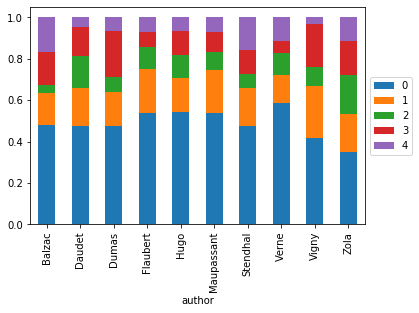

In [86]:
f = plt.figure()
df_2_cluster_author.T.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [80]:
df_3 = df_2.reset_index()

In [81]:
df_3.author = df_3.author.map({'Zola': 'Naturalism', 'Maupassant': 'Naturalism', 'Daudet': 'Naturalism',
                 'Stendhal': 'Literary realism', 'Balzac': 'Literary realism', 'Flaubert': 'Literary realism',
                 'Hugo': 'Romanticism', 'Dumas': 'Romanticism', 'Vigny': 'Romanticism',
                 'Verne': 'Early science-fiction'
                })

In [84]:
df_3['cluster'] = model.predict(X)
df_3_cluster_author = df_3.groupby(['cluster','author']).size().reset_index()
df_3_cluster_author = df_3_cluster_author.pivot(index='author', columns='cluster', values=0)
df_3_cluster_author = df_3_cluster_author
df_3_cluster_author =  (df_3_cluster_author / df_3_cluster_author.sum())

<Figure size 432x288 with 0 Axes>

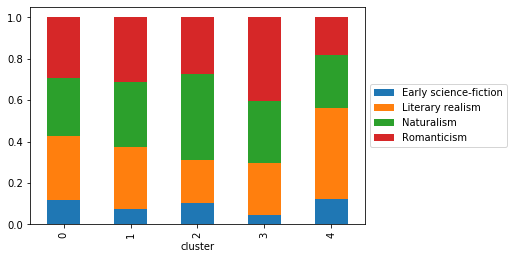

In [85]:
f = plt.figure()
df_3_cluster_author.T.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [87]:
df_3_cluster_author

cluster,0,1,2,3,4
author,,,,,
Early science-fiction,0.120219,0.074343,0.102439,0.043210,0.125000
Literary realism,0.306352,0.298277,0.208130,0.255556,0.439338
Naturalism,0.279030,0.314597,0.417886,0.296296,0.255515
Romanticism,0.294399,0.312783,0.271545,0.404938,0.180147


**Analysis** : we see that the litterary movements are unevenly represented accross clusters. For instance, 44% of cluster 4 is *Literary realism* and only 18% is *Romanticism* (and both are equally represented in the data). This shows that, even though k-means might not be a wise predictor choice, that tf-idf extracts meaningful representaitons of the data, linking texts with authors and their litterary movements.

### Extracting meaning from words with the LDA

LDA stands for Latent Dirichlet Allocation.
It is a simple yet powerful model that has been used in NLP.

It considers latent variables called topics which can take T values. The way of generating a document $d$ from the LDA model is the following :

- Let $\boldsymbol{\alpha}_d = (\alpha_{d1}, ..., \alpha_{dT})  \sim Dirichlet(\alpha_0)$ be a vector of size T.
- Each topic has a vector of probabilities $\boldsymbol{\beta}_t$ of size $|W|$ such that $\beta_{tw}$ is the probabilities of the word $w$ given the topic $t$. For each word $w$ of $d$, draw a topic from the probabilities given by $\boldsymbol{\alpha}_d$ and draw a word from $\boldsymbol{\beta}_t$.

In this case, fitting the models consists of determining the matrices $\boldsymbol{\alpha}$ and $\boldsymbol{\beta}$. For each author, we compute the average of the topic distribution of his documents, that gives us the topic distribution we can associate to him. 

**TODO** continuer à présenter

In [8]:
import nltk

nltk.download('punkt', quiet=True)
nltk.download("stopwords")
_punctuation = '.?!:;&()`"\'@°_-~'
CUSTOM_STOPWORDS = ["--", ".", ",", "!", ";", "’", ":", "?", "...", "'", "«", "»", '(', ')', '[', ']']
other_stopwords = ['comme', 'elles', "c'était", "qu'il", "qu'elle", 'où', 'car', 'sans', 'vers', 'encore', 'cette', 
                  'a', 'faire', 'fait', 'fais', 'à', 'donc', 'tout', 'cet', 'là', 'ceux', 'leur', 'leurs', 'parmi', 
                  'puis', 'ensuite', 'alors', "qu'ils", "qu'elles", "m'en", "j'en", 'dit-il', 'dit-elle', 'répondit',
                  "s'ils", 'vont', "s'il", "n'est", 'pourquoi', "lorsqu'il", "lorsqu'elle", "presque", 'lorsque', 
                  "contre", 'toujours', 'plus', 'dès', 'autre', 'tous', 'tout', 'si', "j'ai", "tous", 'tout', 'toutes',
                  'pourtant', "c'est", "cela", "être", "jamais", "s'était", "l'avait"]

[nltk_data] Downloading package stopwords to /home/jaime/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def make_stopwords_remover(stopwords):
    def stopwords_remover(words):
        return [word for word in words if word not in stopwords]

    return stopwords_remover

def flatten_count(accumulator, items):
    for item in items:
        accumulator[item] = accumulator.get(item, 0) + 1
    return accumulator

In [14]:
import regex as re # needed as re does not allow infinite lookbacks
import pandas as pd

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def extract_proper_noun(txt):
    return re.findall(r"(?<!^|\. |\.  )[A-Z][a-z]+",txt)

french_stopwords = set(stopwords.words("french")).union(CUSTOM_STOPWORDS).union(other_stopwords)

proper_noun_thresh=6
proper_nouns = df.paragraph.apply(extract_proper_noun).apply(pd.Series).stack()
counted = Counter(proper_nouns) 
filtered_proper_nouns = [el for el in proper_nouns if counted[el] >= proper_noun_thresh]
filtered_proper_nouns = np.unique(filtered_proper_nouns)
filtered_proper_nouns = [x.lower() for x in filtered_proper_nouns]

words_to_remove = set(french_stopwords).union(set(filtered_proper_nouns))

df["tokenized"] = df["paragraph"].str.lower().map(word_tokenize)
df["tokenized"] = df["tokenized"].map(make_stopwords_remover(words_to_remove))
docs = df["tokenized"].values

In [15]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=20, no_above=0.5)

corpus = [dictionary.doc2bow(doc) for doc in docs]

from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [17]:
documents_topics = np.zeros((len(corpus), num_topics))
for i in range(documents_topics.shape[0]):
    topics = model.__getitem__(corpus[i])
    for t,p in topics:
        documents_topics[i,t] = p



In [19]:
import matplotlib.pyplot as plt

authors = df['author'].iloc[sample].values
authors_list = ['Balzac', 'Daudet', 'Dumas', 'Hugo', 'Flaubert', 'Maupassant', 'Stendhal', 'Verne', 'Vigny', 'Zola']

#We consider the average of topics distribution of documents for each author
authors_topics = np.zeros((len(authors_list), num_topics))

for i,author in enumerate(authors_list):
    authors_topics[i,:] = np.mean(documents_topics[authors==author,:], axis=0)
    
fig, ax = plt.subplots()
heatmap = ax.imshow(authors_topics, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(num_topics))
ax.set_xticklabels(np.arange(num_topics) + 1)
ax.set_yticks(np.arange(len(authors_list)))
ax.set_yticklabels(authors_list)
fig.colorbar(heatmap)
fig.set_size_inches(11,7)

fig.show()

<Figure size 1200x1200 with 1 Axes>

In [ ]:
import pyLDAvis.gensim

model_vis_data = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(model_vis_data)

## Predictions

Using the previous studies, we can build a predictive pipeline that can learn to classify documents by authors.

In [ ]:
# Load data

import problem

X_train, y_train = problem.get_train_data(sep='|')
X_test, y_test = problem.get_test_data(sep='|')

### Feature extractor

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.vectorizer = TfidfVectorizer(strip_accents='ascii',
                                          max_df=0.7)

    def fit(self, X_df, y=None):
        self.vectorizer.fit(X_df['paragraph'])
        return self

    def transform(self, X_df):
        X_preprocessed = self.vectorizer.transform(X_df['paragraph'])
        return X_preprocessed
    
feature_extractor = FeatureExtractor()

### Classifier

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression

class Classifier(BaseEstimator):
    def __init__(self):
        self.classifier = LogisticRegression(solver='lbfgs', max_iter=1000,
                                             multi_class='multinomial')

    def fit(self, X, y):
        self.classifier.fit(X, y)
        return self

    def predict(self, X):
        y_pred = self.classifier.predict(X).astype(int)
        return y_pred

    def predict_proba(self, X):
        proba_pred = self.classifier.predict_proba(X)
        return proba_pred
    
classifier = Classifier()

### Score metric

In [ ]:
from rampwf.score_types.classifier_base import ClassifierBaseScoreType
from sklearn.metrics import f1_score

class F1Score(ClassifierBaseScoreType):
    is_lower_the_better = False
    minimum = 0.0
    maximum = 1

    def __init__(self, name="F1-score", precision=2):
        self.name = name
        self.precision = precision

    def __call__(self, y_true, y_pred):
        return f1_score(y_true, y_pred, average='micro')
    
scorer = F1Score()

### Score on test data

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

clf = Pipeline(steps=[
    ('feature_extractor', feature_extractor),
    ('classifier', classifier)])

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_score = scorer(y_true=y_train, y_pred=y_train_pred)
test_score = scorer(y_true=y_test, y_pred=y_pred)

print('F1 score on train set : ', train_score)
print('F1 score on test set : ', test_score)

We observe that there is an obvious overfit problem. This could be due to including particular names in the paragraph, for instance character names. Due to this, the training focusis on this non-generalizable* aspect of the input features, resulting in high-verfit.

*Non generalizable as we took care of choosing different books for the test and train set.

## Ramp workflow

### Submission structure

Each submission should be in it's own folder within the `submissions` folder (e.g. `submissions/my_submission`). The submission directory should contain 2 files:

* `feature_extractor.py` - this should implement a feature extractor with `fit()` and `transform()` methods
* `classifier.py` - this should implement a classifier with `fit()` and `predict_proba()` methods

See `submissions/starting_kit` for an example.

### Local testing (before submission)

The `ramp-workflow` library provides a unit test - `ramp_test_submission` - to check whether a submission works locally before submitting it to the server. This command will test on files in [`submissions/starting_kit`](/submissions/starting_kit) by default. To specify testing on a different folder use the flag `--submission`. For example to run the test on `submissions/solution1` use: `ramp_test_submission --submission solution1`.

In [33]:
!ramp_test_submission --submission starting_kit

Testing Who wrote this? Predicting the author of a paragraph
Reading train and test files from ./data ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  F1-score       time
	train      0.91  46.961329
	valid      0.82   3.172486
	test       0.48   1.174487
CV fold 1
	score  F1-score       time
	train      0.91  44.838507
	valid      0.81   3.544223
	test       0.49   1.447141
CV fold 2
	score  F1-score       time
	train      0.91  49.533708
	valid      0.81   3.491098
	test       0.48   1.336885
CV fold 3
	score  F1-score       time
	train      0.91  47.044122
	valid      0.81   3.691056
	test       0.48   1.259212
CV fold 4
	score  F1-score       time
	train      0.91  44.738262
	valid      0.82   3.830624
	test       0.48   1.242205
CV fold 5
	score  F1-score       time
	train      0.91  41.554646
	valid      0.82   3.501600
	test       0.48   1.317080
----------------------------
Mean CV scores
----------------------------
	score      F1-score         time
	t

## More information

You can find more information in the README of the [ramp-workflow](https://github.com/paris-saclay-cds/ramp-workflow) library.